<a href="https://colab.research.google.com/github/drkbluescience/TimeSeries-ML/blob/main/Preprocessing_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from numpy.fft import *

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


from google.colab import drive
import os

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/"

## Dataset 1- Passengers

In [ ]:
!kaggle datasets download -d rakannimer/air-passengers
!unzip \*.zip  && rm *.zip

  0% 0.00/764 [00:00<?, ?B/s]
100% 764/764 [00:00<00:00, 1.88MB/s]
Archive:  air-passengers.zip
  inflating: AirPassengers.csv       


In [ ]:
passenger = pd.read_csv('AirPassengers.csv')
passenger.rename(columns={"#Passengers": "Passengers"}, inplace=True)

#Sort the values according to dates.
passenger.sort_values(by=['Month'], inplace=True, ascending=True)
passenger.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Missing Value Imputation in Time Series
**Interpolation**
- Time-Based Interpolation
- Spline Interpolation
- Linear Interpolation

In [ ]:
def visualization(x_val, y_val, title, x, y):
  figure(figsize=(8, 5), dpi=80, linewidth=10)
  plt.plot(x_val, y_val)
  plt.title(title)
  plt.xlabel(x, fontsize=14)
  plt.ylabel(y, fontsize=14)
  plt.show()


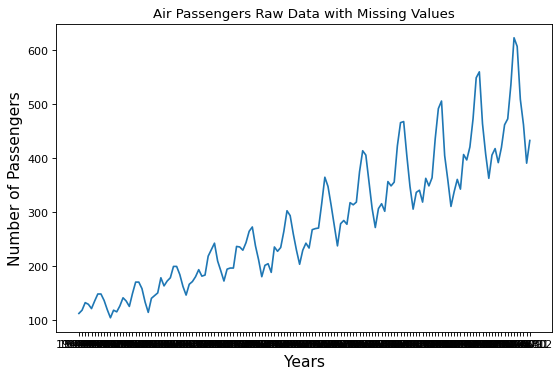

In [ ]:
visualization(passenger['Month'],
              passenger['Passengers'],
              'Air Passengers Raw Data with Missing Values', 'Years', 'Number of Passengers')

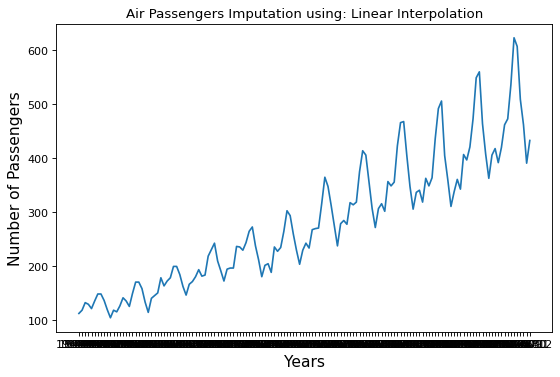

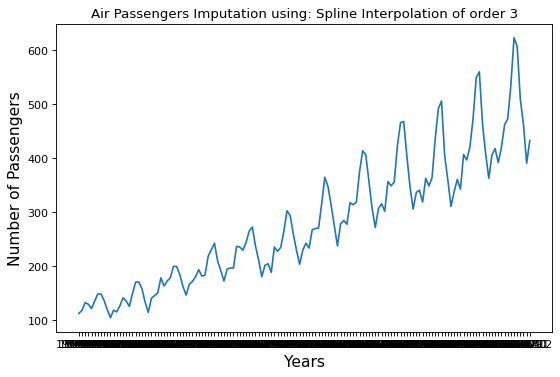

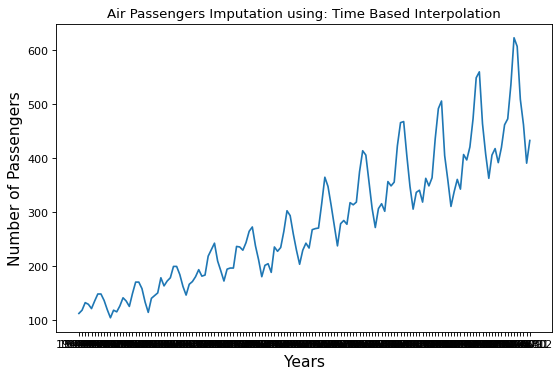

In [ ]:
passenger['Linear'] = passenger['Passengers'].interpolate(method='linear')
passenger['Spline order 3'] = passenger['Passengers'].interpolate(method='spline', order=3)
passenger['Time'] = passenger['Passengers'].interpolate(method='time')
methods = ['Linear', 'Spline order 3', 'Time']

types=["Linear Interpolation", "Spline Interpolation of order 3", "Time Based Interpolation"]
i = 0

for method in methods:
  visualization(passenger["Month"],
                passenger[method],
                "".join(['Air Passengers Imputation using: ', types[i]]),
                "Years", "Number of Passengers")
  i += 1

#Dataset 2- Google Stock Price

In [ ]:
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231
!unzip \*.zip  && rm *.zip

  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 163MB/s]
Archive:  stock-time-series-20050101-to-20171231.zip
  inflating: AABA_2006-01-01_to_2018-01-01.csv  
  inflating: AAPL_2006-01-01_to_2018-01-01.csv  
  inflating: AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: AXP_2006-01-01_to_2018-01-01.csv  
  inflating: BA_2006-01-01_to_2018-01-01.csv  
  inflating: CAT_2006-01-01_to_2018-01-01.csv  
  inflating: CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: CVX_2006-01-01_to_2018-01-01.csv  
  inflating: DIS_2006-01-01_to_2018-01-01.csv  
  inflating: GE_2006-01-01_to_2018-01-01.csv  
  inflating: GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: GS_2006-01-01_to_2018-01-01.csv  
  inflating: HD_2006-01-01_to_2018-01-01.csv  
  inflating: IBM_2006-01-01_to_2018-01-01.csv  
  inflating: INTC_2006-01-01_to_2018-01-01.csv  
  inflating: JNJ_2006-01-01_to_2018-01-01.csv  
  inflating: JPM_2006-01-01_to_2018-01-01.csv  
  inflating: KO_2006-01-01_to_2018-01-01.csv  
  inflati

# Denoising a Time Series

### Rolling means
The Rolling mean refers to the average computed over a specific window of past observations, with the window consisting of a sequence of values from the time series dataset. A mean value is determined for each consecutive window, which proves highly beneficial in reducing the presence of noise within the time series data.

In [ ]:
# Get the Google stock data among the files
google_stock_price = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")
google_stock_price.head(10)

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
5,2006-01-10,232.44,235.36,231.25,235.11,9104719,GOOGL
6,2006-01-11,235.87,237.79,234.82,236.05,9008664,GOOGL
7,2006-01-12,237.10,237.73,230.98,232.05,10125212,GOOGL
8,2006-01-13,232.39,233.68,231.04,233.36,7660220,GOOGL
9,2006-01-17,231.76,235.18,231.50,233.79,8335300,GOOGL


In [ ]:
google_stock_price.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


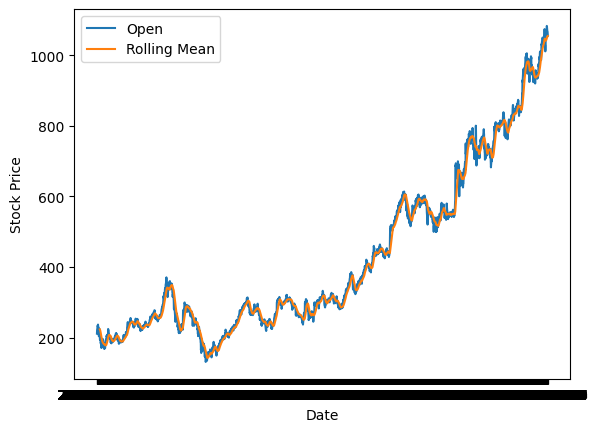

In [ ]:
rolling_google = google_stock_price['Open'].rolling(20).mean()

plt.plot(google_stock_price['Date'], google_stock_price['Open'])
plt.plot(google_stock_price['Date'], rolling_google)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['Open','Rolling Mean'])
plt.show()

### Fourier Transform
Fourier Transform can help remove the noise by converting the time series data into the frequency domain, and from there, we can filter out the noisy frequencies. Then, we can apply the inverse Fourier transform to obtain the filtered time series.

In [ ]:
def fft_denoiser(signal, threshold=1e8):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

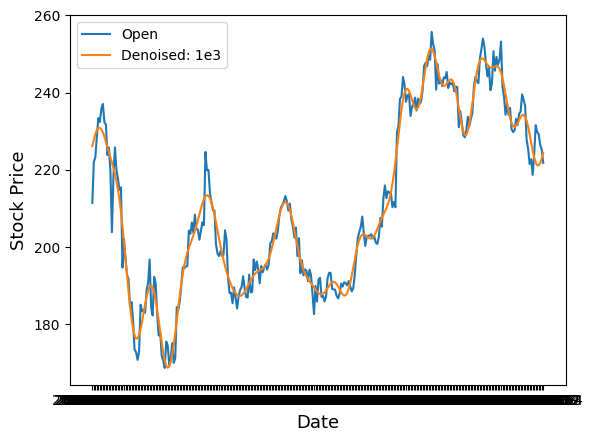

In [ ]:
time =google_stock_price['Date'][0:300]
value = google_stock_price['Open'][0:300]

denoised_google_stock_price = fft_denoiser(value, 1e3)

plt.plot(time, value)
plt.plot(time, denoised_google_stock_price)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Stock Price', fontsize = 13)
plt.legend(['Open','Denoised: 1e3'])
plt.show()

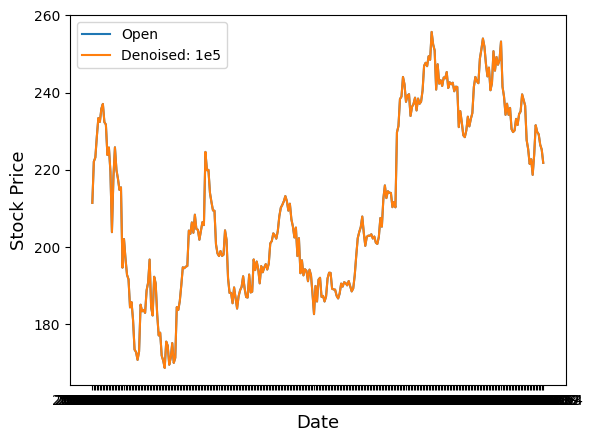

In [ ]:
denoised_google_stock_price = fft_denoiser(value, 1e5)

plt.plot(time, value)
plt.plot(time, denoised_google_stock_price)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Stock Price', fontsize = 13)
plt.legend(['Open','Denoised: 1e5'])
plt.show()

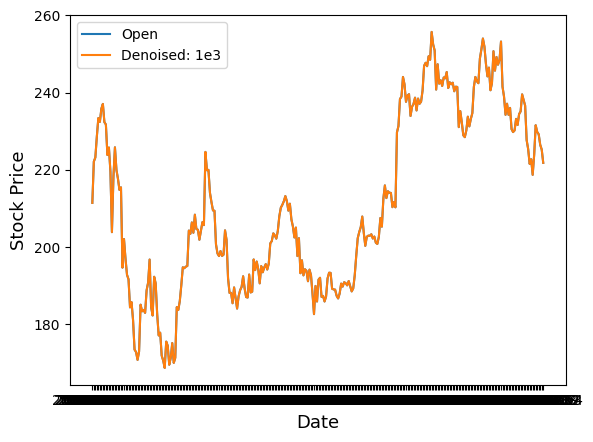

In [ ]:
denoised_google_stock_price = fft_denoiser(value)

plt.plot(time, value)
plt.plot(time, denoised_google_stock_price)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Stock Price', fontsize = 13)
plt.legend(['Open','Denoised: 1e8'])
plt.show()

In [ ]:
# Done!